# HW Assignment 4 - Matei Tarcea
First chat log with ChatGPT (Q 1-4): https://chatgpt.com/share/66ff4ae2-55e8-8006-8661-aedafcb589d8
Second chat log with ChatGPT (Q 5-7):https://chatgpt.com/share/66ff5a82-b33c-8006-a4c8-fcf01cc7ce09
Third chat log with ChatGPT (Q 8):https://chatgpt.com/share/66ff5a90-6c48-8006-96a9-3e8c6376d3a5

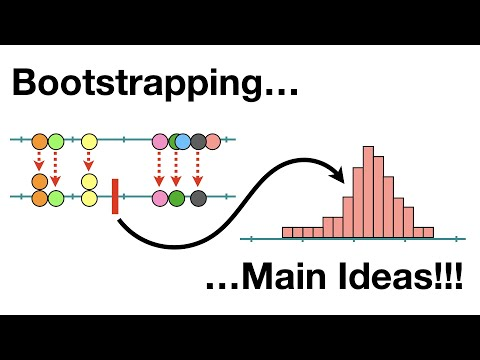

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Question 1: 

The difference between the standard deviation of the original data and the standard error of the mean is that the standard devation is the spread from the original mean of individual points. The standard error of the mean is the standard deviation from the distribution of the means, this focuses on the precision of the sample mean to the population mean. 

# Question 2: 

The way to create a 95% confidence level is to first find the sample mean. After finding the sample mean we want to find the standard error of the mean, this can be done in two ways either using the standard deviation and the sample size or using the standard deviation of the bootstrapped sample means. Next we need to find the critical value for our confidence level, the critical value is a cutoff point that determines the boundaries of the confidence interval. For the confidence level of 95% we use a z score of about 1.96. After finding our critical value we then have to calculate our confidence interval which is done by making an interval which is equal to: [$\bar{x}$-(CV\*SEM), $\bar{x}$+(CV\*SEM] (CV = Critical Value, SEM = Standard Error of the Mean).

# Question 3: 

You can create a 95% bootstrapped confidence interval without using the standard deviation to estimate the standard error of the mean by first obtaining the bootstrapped sample means. Then we sort the bootstrapped the sample means in ascending order to create a histogram. Afterwards attempt to identify the 2.5th and 97.5th percintle of the boostrapped means. The 95% confidence interval is just the range between the two percentiles. 

# Question 4: 

In [42]:
import numpy as np

# Define the bootstrap confidence interval function
def bootstrap_ci(data, stat_function=np.mean, n_bootstrap=1000, ci_percentile=95):
    """
    Generates a bootstrap confidence interval for a specified statistic.
    
    Parameters:
    - data: The sample data (numpy array or list).
    - stat_function: The statistic function to compute (default is np.mean).
    - n_bootstrap: Number of bootstrap resamples to generate (default is 1000).
    - ci_percentile: The confidence level for the interval (default is 95%).

    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    """

    # Create an array to hold bootstrap sample statistics
    bootstrap_statistics = []

    # Generate bootstrap samples and compute the statistic
    for _ in range(n_bootstrap):
        # Bootstrap resampling: randomly select data points with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the statistic for the resample and store it
        bootstrap_statistics.append(stat_function(resample))

    # Convert to a numpy array for easier manipulation
    bootstrap_statistics = np.array(bootstrap_statistics)
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci_percentile) / 2)

    return lower_bound, upper_bound

# Example sample data
sample_data = np.array([12, 15, 14, 10, 13, 14, 15, 16, 12, 13])

# Compute the 95% confidence interval for the mean
mean_ci = bootstrap_ci(sample_data, stat_function=np.mean)
print("95% Bootstrap Confidence Interval for the Mean:", mean_ci)

# Modify the stat_function to compute the 95% confidence interval for the median
median_ci = bootstrap_ci(sample_data, stat_function=np.median)
print("95% Bootstrap Confidence Interval for the Median:", median_ci)


95% Bootstrap Confidence Interval for the Mean: (12.3, 14.4)
95% Bootstrap Confidence Interval for the Median: (12.0, 15.0)


In [38]:
import numpy as np

# Define the bootstrap confidence interval function
def bootstrap_ci(data, stat_function=np.mean, n_bootstrap=1000, ci_percentile=95):
    """
    Generates a bootstrap confidence interval for a specified statistic.
    
    Parameters:
    - data: The sample data (numpy array or list).
    - stat_function: The statistic function to compute (default is np.mean).
    - n_bootstrap: Number of bootstrap resamples to generate (default is 1000).
    - ci_percentile: The confidence level for the interval (default is 95%).

    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    """

    # Create an array to hold bootstrap sample statistics
    bootstrap_statistics = []

    # Generate bootstrap samples and compute the statistic
    for _ in range(n_bootstrap):
        # Bootstrap resampling: randomly select data points with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the statistic for the resample and store it
        bootstrap_statistics.append(stat_function(resample))

    # Convert to a numpy array for easier manipulation
    bootstrap_statistics = np.array(bootstrap_statistics)
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrap_statistics, 100 - (100 - ci_percentile) / 2)

    return lower_bound, upper_bound

# Example sample data
sample_data = np.array([12, 15, 14, 10, 13, 14, 15, 16, 12, 13])

# Compute the 95% confidence interval for the mean
mean_ci = bootstrap_ci(sample_data, stat_function=np.mean)
print("95% Bootstrap Confidence Interval for the Mean:", mean_ci)

# Modify the stat_function to compute the 95% confidence interval for the median
var_ci = bootstrap_ci(sample_data, stat_function=np.var)
print("95% Bootstrap Confidence Interval for the Median:", var_ci)


95% Bootstrap Confidence Interval for the Mean: (12.4, 14.4)
95% Bootstrap Confidence Interval for the Median: (0.85, 4.85)


# Summary of Pre-Lecture homework: 

Here’s a summary of our conversation:

1. **Standard Error of the Mean vs Standard Deviation**: 
   You asked about the difference between the "standard error of the mean" (SEM) and the "standard deviation" (SD) of the original data. We discussed how SD measures the variability of individual data points, while SEM measures the variability of the sample mean and how precisely it estimates the population mean. SEM is smaller than SD and can be used to estimate the confidence interval for the population mean.

2. **Confidence Intervals with SEM**: 
   You inquired about creating a 95% confidence interval using the SEM. We walked through the process, showing that the confidence interval is calculated as \(\bar{x} \pm 1.96 \times SEM\) for a 95% confidence level. This captures the range where the population mean is likely to fall.

3. **Bootstrap Confidence Interval for the Mean**: 
   You asked how to create a 95% confidence interval for the population mean using bootstrapping (without estimating SEM). We explained the percentile-based method, which involves resampling the data, calculating the means for each resample, sorting those means, and then taking the 2.5th and 97.5th percentiles to form the confidence interval.

4. **Generalizing Bootstrap Confidence Intervals**: 
   Finally, you asked how to modify the process to compute bootstrap confidence intervals for statistics other than the mean, such as the median. We provided Python code that computes a 95% bootstrap confidence interval for the population mean, with clear comments on how to adapt the code for other statistics (e.g., median, variance, or maximum). The code uses bootstrapped resampling and a flexible function to calculate the desired statistic's confidence interval.

In summary, we covered the theory and practical coding implementation for computing both SEM-based and bootstrap-based confidence intervals for various statistics.

# Question 5: 

We need to distinguish between the sample statistic and population parameter when it comes to confidence intervals because the sample statistic is the basis for estimating the population parameter. The population parameter is what we are looking for and our estimate for it, the confidence interval relates to this because it reflects how uncertain or certain our estimate is. 

# Question 6: 

When you bootstrap a sample of data we look first at the original sample. This is a sample of a whole population so we attempt to increase our accuracy by drawing values from the original sample and making multiple samples from it. We do this by drawing one of the values at random from the original sample but we draw the SAME amount of samples as the original. While this sounds like we are recreating the original sample we are allowed to take the same value multiple times if we randomly select it. For example if the sample looks like this: [1, 2, 3, 4, 5] we could end up with a bootstrapped sample that looks like this: [3, 1, 1, 5 ,3]. After we get our new sample we calculate the mean of this new sample, we then have to repeat this step thousands of times and we sort all of these means into a histogram which is a sort of bar graph where the bars are a range of occurrences rather than a set number of occurrences. The main purpose of bootstrapping is to create a confidence interval, a confidence interval is the interval in which for a large number of means x% of them will contain the true population mean. If you had a guess about the mean of the population and a size of the population you could see if your guess is good or not using the size of the population size you would need to bootstrap through your data and create your confidence interval. Once you have created your confidence interval compare your guess to the confidence interval, if your guess lies within the confidence interval then your guess is a decent guess. 

# Question 7:

A confidence interval overlapping zero 'fails to reject the null hypothesis' because while the sample mean is not zero if the confidence interval contains zero there is still a reasonable assumption that the population mean could be zero therefore it is a null hypothesis. Some ways to reject the null hypothesis would be if zero is not within the confidence interval and if there is a very large sample size a small difference from the null hypothesis has a greater signifigance than if the sample size was small sample size. 

# Question 8: 
AliTech has released some new data about how their new vaccine affects the health of the people who took it, I will attempt to show whether the vaccine is effictive or not. 

When looking at the data we are looking to see if the null hypothesis is there or not, this would mean that if the zero mean when bootstrapping is within the confidence interval there is a chance that the vaccine has no effect, but if the confidence interval is only greater than 0 it is a good assumption that the vaccine has a positive effect on the users. 

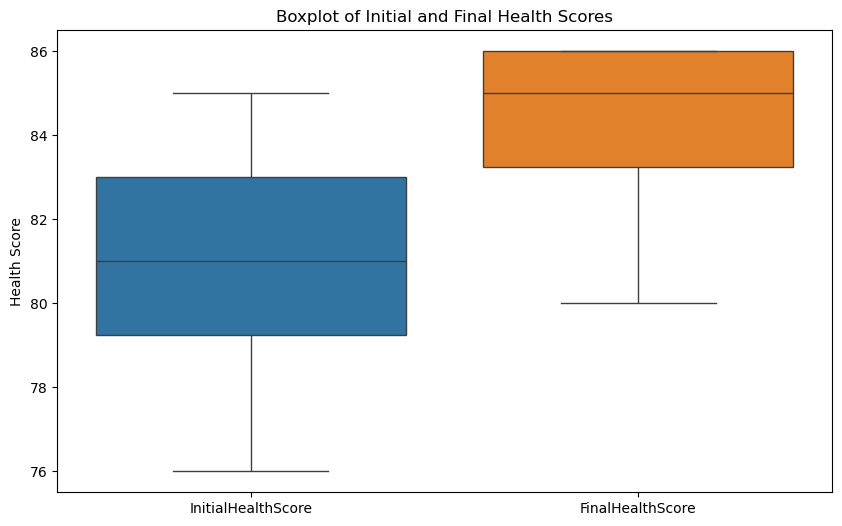

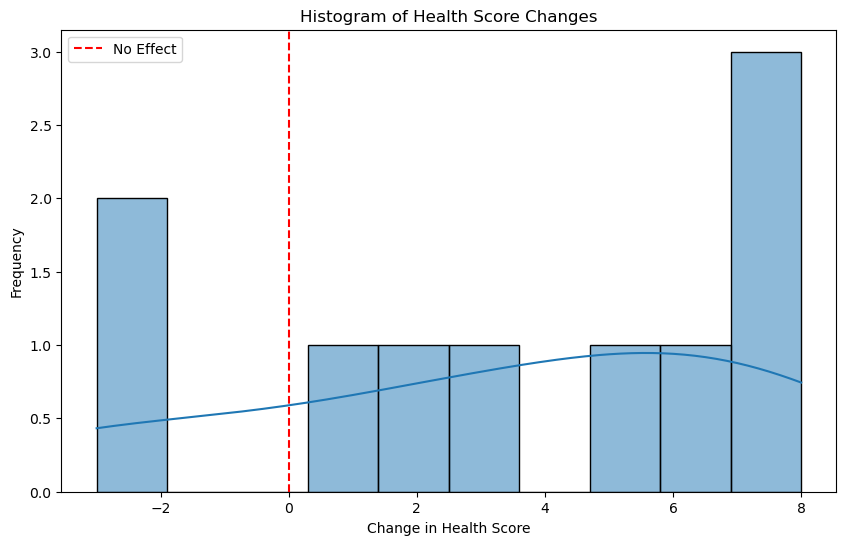

95% Confidence Interval for the Mean Change: (0.90, 5.60)


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.DataFrame({
    'PatientID': range(1, 11),
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate change in health scores
data['Change'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping
num_resamples = 10000
boot_means = []

for _ in range(num_resamples):
    sample = np.random.choice(data['Change'], size=len(data), replace=True)
    boot_means.append(np.mean(sample))

# Calculate confidence intervals
lower_ci = np.percentile(boot_means, 2.5)
upper_ci = np.percentile(boot_means, 97.5)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Boxplot of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.show()

# Histogram of changes
plt.figure(figsize=(10, 6))
sns.histplot(data['Change'], bins=10, kde=True)
plt.title('Histogram of Health Score Changes')
plt.xlabel('Change in Health Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='No Effect')
plt.legend()
plt.show()

# Output confidence intervals
print(f"95% Confidence Interval for the Mean Change: ({lower_ci:.2f}, {upper_ci:.2f})")


When looking at the confidence interval for the mean change of the health scores 0 is not a part of this interval so therefore the vaccine should have a positive impact on the users health even if it is minimal. Because 0 is not part of this interval we can reject the null hypothesis. 

Some further considerations we can take if we were to repeat this study would be to use a larger sample size as this quite a small sample. 

# Question 9:
Yes